### Chemostat

A chemostat is a bioreactor where fresh medium is continuously added while the culture liquid (containing nutrients and microorganisms) is continuously removed to keep the culture volume constant.

- **Constant Volume:** The inflow rate $F$ equals the outflow rate, keeping volume $V$ constant.
- **Perfect Mixing:** The concentration of nutrients and bacteria is uniform throughout the tank.
- **Limiting Nutrient:** Growth is limited by a single resource (concentration $c$).
- **Saturation Kinetics:** The growth rate follows a Monod-style saturation function rather than being infinitely linear.

The model is defined by a system of two coupled ordinary differential equations (ODEs):
$$\begin{cases} \frac{dN}{dt} = k_{max}\frac{c}{c+p}N - \frac{F}{V}N \\ \frac{dc}{dt} = -\alpha k_{max}\frac{c}{c+p}N + \frac{F}{V}c_{0} - \frac{F}{V}c \end{cases}$$

| **Symbol**    | **Definition**                  | **Biological/Physical Role**                                                 |
| ------------- | ------------------------------- | ---------------------------------------------------------------------------- |
| $N$           | **Bacterial Population**        | The dependent variable representing biomass density.                         |
| $c$           | **Nutrient Concentration**      | The dependent variable for the "food" available in the tank.                 |
| $c_0$         | **Inflow Concentration**        | The concentration of nutrients in the fresh medium being pumped in.          |
| $F$           | **Flow Rate**                   | Volume of medium added/removed per unit of time.                             |
| $V$           | **Volume**                      | The fixed capacity of the petri dish or tank.                                |
| $k_{max}$     | **Max Growth Rate**             | The biological limit of how fast the bacteria can reproduce.                 |
| $p$           | **Half-saturation constant**    | The concentration $c$ at which the growth rate is exactly half of $k_{max}$. |
| $\alpha$      | **Yield Coefficient**           | Represents how much nutrient is consumed to produce one unit of biomass.     |
| $\frac{F}{V}$ | **Dilution Rate ($\tilde{F}$)** | The "washout" rate; how quickly the tank contents are replaced.              |
| $\tilde{F}$   | **Dilution Rate**               | The "washout" rate; how quickly the tank contents are replaced.              |

We start with the population change $\frac{dN}{dt}$. If growth were unlimited, we would use $kN$. However, resources are finite. We use the **Monod function** $k(c) = k_{max}\frac{c}{c+p}$.

- If $c$ is very high, $k(c) \approx k_{max}$ (Growth is limited by biology).
- If $c$ is very low, growth is proportional to the nutrient (Growth is limited by physics).

Because the tank is drained at rate $F$, bacteria are lost. The loss term is proportional to the current population: $-\frac{F}{V}N$. Combining these gives:
$$\frac{dN}{dt} = \underbrace{k_{max}\frac{c}{c+p}N}_{\text{Birth}} - \underbrace{\frac{F}{V}N}_{\text{Death/Removal}}$$
The nutrient $c$ changes in three ways:

1. **Supply:** Fresh medium $c_0$ enters at rate $F$, distributed over volume $V$: $+\frac{F}{V}c_0$.
2. **Consumption:** Bacteria eat the nutrient. We multiply the bacterial growth rate by a yield factor $\alpha$: $-\alpha k_{max}\frac{c}{c+p}N$.
3. **Outflow:** Unused nutrients are washed out: $-\frac{F}{V}c$.

Based on the model equations:

1. **$\frac{dN}{dt} = 0 \implies \left(k_{max}\frac{c}{c+p} - \tilde{F}\right)N = 0$**
2. **$\frac{dc}{dt} = 0 \implies -\alpha k_{max}\frac{c}{c+p}N + \tilde{F}c_0 - \tilde{F}c = 0$**

From equation (1), one obvious solution is $N^* = 0$. Substitute $N = 0$ into equation (2):

- $0 + \tilde{F}c_0 - \tilde{F}c = 0$
- $\tilde{F}c = \tilde{F}c_0$
- **$c^* = c_0$**

**Fixed Point 1: $(c^*, N^*) = (c_0, 0)$**

If $N \neq 0$, then $\left(k_{max}\frac{c}{c+p} - \tilde{F}\right) = 0$, we solve equation (1) for $c$:

- $k_{max}\frac{c}{c+p} - \tilde{F} = 0$
- $k_{max}c = \tilde{F}(c + p)$
- $c(k_{max} - \tilde{F}) = \tilde{F}p$
- **$c^* = \frac{\tilde{F}p}{k_{max} - \tilde{F}}$**

Now, substitute this $c^*$ into equation (2) to find $N$. To simplify, notice from the step above that $k_{max}\frac{c^*}{c^*+p} = \tilde{F}$. Replace that term in equation (2):

- $-\alpha (\tilde{F}) N + \tilde{F}c_0 - \tilde{F}c^* = 0$
- Divide the whole equation by $\tilde{F}$: $-\alpha N + c_0 - c^* = 0$
- $\alpha N = c_0 - c^*$
- **$N^* = \frac{c_0 - c^*}{\alpha} = \frac{c_0}{\alpha} - \frac{\tilde{F}p}{\alpha(k_{max} - \tilde{F})}$**

**Fixed Point 2: $(c^*, N^*) = \left(\frac{\tilde{F}p}{k_{max}-\tilde{F}}, \frac{c_0}{\alpha} - \frac{\tilde{F}p}{\alpha(k_{max}-\tilde{F})}\right)$**

To determine if these states are stable, we use the **Jacobian Matrix** ($J$), which represents the local linear behavior of the system. For a simplified version where $\alpha=1, p=1, \tilde{F}=1$:
$$\underline{\underline{J}}(c,N) = \begin{bmatrix} \frac{\partial \dot{c}}{\partial c} & \frac{\partial \dot{c}}{\partial N} \\ \frac{\partial \dot{N}}{\partial c} & \frac{\partial \dot{N}}{\partial N} \end{bmatrix} = \begin{bmatrix} -\frac{k_{max}}{(c+1)^2}N - 1 & -\frac{k_{max}c}{c+1} \\ \frac{k_{max}}{(c+1)^2}N & \frac{k_{max}c}{c+1} - 1 \end{bmatrix}$$
The first steady state is $(c^*, N^*) = (c_0, 0)$. This represents a scenario where the bacteria have been washed out of the tank. Substitute $N=0$ and $c=c_0$ into the matrix:
$$\underline{\underline{J}}(c_0,0) = \begin{bmatrix} -1 & -\frac{k_{max}c_0}{c_0+1} \\ 0 & \frac{k_{max}c_0}{c_0+1} - 1 \end{bmatrix}$$
For a triangular matrix, the eigenvalues ($\lambda$) are the diagonal elements:

- $\lambda_1 = -1$
- $\lambda_2 = \frac{k_{max}c_0}{c_0+1} - 1$

A steady state is stable if all eigenvalues have negative real parts.

- $\lambda_1$ is always negative (-1).    
- For $\lambda_2$ to be negative:$$\frac{k_{max}c_0}{c_0+1} - 1 < 0 \implies \frac{k_{max}c_0}{c_0+1} < 1$$This inequality is a comparison between two opposing forces:
	- **The Left Side ($\frac{k_{max}c_0}{c_0+1}$):** This is the **Biotic Potential**. It represents the fastest the bacteria can possibly grow given the food ($c_0$) available in the tank. This is similar to the birth term with $p=1$ and $c=c_0$.
	- **The Right Side ($1$):** This is the **Dilution Rate** ($\tilde{F}$). It represents the speed at which the "drain" is removing everything from the tank.
	- **If Growth < Dilution:** The bacteria are being sucked out of the drain faster than they can divide. The population $N$ will drop to 0. The "Washout" state is **Stable**.
	- **If Growth > Dilution:** The bacteria reproduce fast enough to overcome the drain. The population $N$ will grow. The "Washout" state becomes **Unstable**, and the system moves toward the "Survival" steady state.

For the population $N$ to increase, the derivative $\frac{dN}{dt}$ must be positive. Looking at the simplified equation:
$$\frac{dN}{dt} = \left( k_{max} \frac{c}{c+1} - 1 \right) N$$
If $N$ is just starting out, the nutrient concentration $c$ is at its maximum possible value: the inflow concentration, $c_0$. Therefore, for growth to happen:
$$k_{max} \frac{c_0}{c_0+1} > 1$$
We isolate $c_0$ to find the "Survival" condition:

1. **Multiply by $(c_0 + 1)$:** $k_{max} c_0 > c_0 + 1$    
2. **Move $c_0$ to the left:** $k_{max} c_0 - c_0 > 1$
3. **Factor out $c_0$:** $c_0 (k_{max} - 1) > 1$
4. **Divide by $(k_{max} - 1)$:** $c_0 > \frac{1}{k_{max} - 1}$

we apply the constraints: $\alpha = 1$, $p = 1$, and $\tilde{F} = \frac{F}{V} = 1$. The second steady state occurs when $N \neq 0$, found at:
$$(c^*, N^*) = \left( \frac{1}{k_{max}-1}, c_0 - \frac{1}{k_{max}-1} \right)$$
At this point, we know from the equilibrium condition $\frac{dN}{dt}=0$ that $k_{max}\frac{c^*}{c^*+1} = 1$ ($\tilde{F} = \frac{F}{V} = 1$). Substituting this into the Jacobian simplifies the right-hand column significantly:

- **Top Right:** $-\frac{k_{max}c^*}{c^*+1} = -1$
- **Bottom Right:** $\frac{k_{max}c^*}{c^*+1} - 1 = 1 - 1 = 0$

Now, let $A = \frac{k_{max}}{(c^*+1)^2}N^*$. Since $k_{max}, c^*,$ and $N^*$ are all positive values, **$A$ must be positive**. The Jacobian at the survival state becomes:
$$\underline{\underline{J}}(c^*, N^*) = \begin{bmatrix} -A - 1 & -1 \\ A & 0 \end{bmatrix}$$
For a $2 \times 2$ matrix, local asymptotic stability is guaranteed if the Trace is negative and the Determinant is positive.

1. **Trace ($Tr = \lambda_1 + \lambda_2$):** $$Tr(J) = (-A - 1) + 0 = -(A + 1)$$ Since $A > 0$, the **$Tr(J) < 0$** (Negative).
2. **Determinant ($Det = \lambda_1 \lambda_2$):** $$Det(J) = (-A - 1)(0) - (-1)(A) = A$$ Since $A > 0$, the **$Det(J) > 0$** (Positive).

**Conclusion:** Because $Tr < 0$ and $Det > 0$, the survival steady state is **locally asymptotically stable**. The population will converge to this equilibrium and remain there.

1. **The Critical Dilution Rate (Washout Point):** In exponential growth, a population grows forever. In a chemostat, if you pump liquid in too fast, the bacteria are washed out faster than they can reproduce.
	1. This model allows us to calculate the **Washout Threshold**: $\tilde{F}_{critical} = \frac{k_{max}c_0}{c_0 + p}$. In the population equation, the bacteria only stop changing ($\frac{dN}{dt} = 0$) when their growth matches the dilution rate $k_{max}\frac{c}{c+p} = \tilde{F}$.
	2. The bacteria grow fastest when the nutrient concentration $c$ in the tank is at its absolute maximum. In a chemostat, the nutrient level can never exceed the concentration of the food being pumped in, which is $c_0$.
	3. Therefore, the **Maximum Possible Growth Rate** in the tank is $\text{Max Growth} = k_{max}\frac{c_0}{c_0+p}$.
	4. Washout occurs if the dilution rate ($\tilde{F}$) is higher than this maximum possible growth rate. If you pump liquid out faster than the bacteria can possibly reproduce (even with "infinite" food $c_0$), the population must drop to zero.
	5. The **Critical Dilution Rate** ($\tilde{F}_{critical}$) is the exact value where the pump speed perfectly matches this maximum growth $\tilde{F}_{critical} = \frac{k_{max}c_0}{c_0+p}$.
	6. If your flow rate $\tilde{F}$ exceeds this value, the population will go to zero ($N=0$).
	7. We previously found the steady-state population formula $N^* = \frac{c_0}{\alpha} - \frac{\tilde{F}p}{\alpha(k_{max} - \tilde{F})}$. For a population to physically exist, $N^*$ must be greater than zero ($N^* > 0$). Let's solve the inequality:
		1. Set $N^* > 0$: $\frac{c_0}{\alpha} > \frac{\tilde{F}p}{\alpha(k_{max} - \tilde{F})}$
		2. **Cancel $\alpha$ and multiply by $(k_{max} - \tilde{F})$:** $c_0(k_{max} - \tilde{F}) > \tilde{F}p$
		3. **Expand:** $c_0 k_{max} - c_0 \tilde{F} > \tilde{F}p$
		4. **Group $\tilde{F}$ terms:** $c_0 k_{max} > \tilde{F}p + c_0 \tilde{F}$
		5. **Factor out $\tilde{F}$:** $c_0 k_{max} > \tilde{F}(p + c_0)$
		6. **Isolate $\tilde{F}$:** $\frac{k_{max}c_0}{c_0+p} > \tilde{F}$
2. **Predicted Nutrient Residue ($c^*$):** Unlike exponential models where resources are ignored, this model tells us the exact concentration of "leftover" nutrients in the tank at equilibrium.
	1. **The Insight:** The steady-state nutrient concentration $c^*$ depends **only** on the flow rate and biological constants, not on the initial amount of bacteria.
		1. $c^* = \frac{\tilde{F}p}{k_{max} - \tilde{F}}$.
3. **Sustainable Biomass Yield ($N^*$):** This model calculates the constant density of bacteria you can "harvest" from the system continuously.
	1. It gives the **Steady State Population**: $N^* = \frac{c_0 - c^*}{\alpha}$.
	2. This tells a researcher exactly how much biomass (e.g., for insulin production or lab studies) will be produced per hour given a specific inflow of food $c_0$.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [6]:
def chemostat(y, t, k_max, c0, p, alpha, F_tilde):
    N, c = y

    growth = k_max * (c / (c + p)) * N    
    dNdt = growth - F_tilde * N
    dcdt = -alpha * growth + F_tilde * c0 - F_tilde * c
    
    return [dNdt, dcdt]

### Time Series Evolution

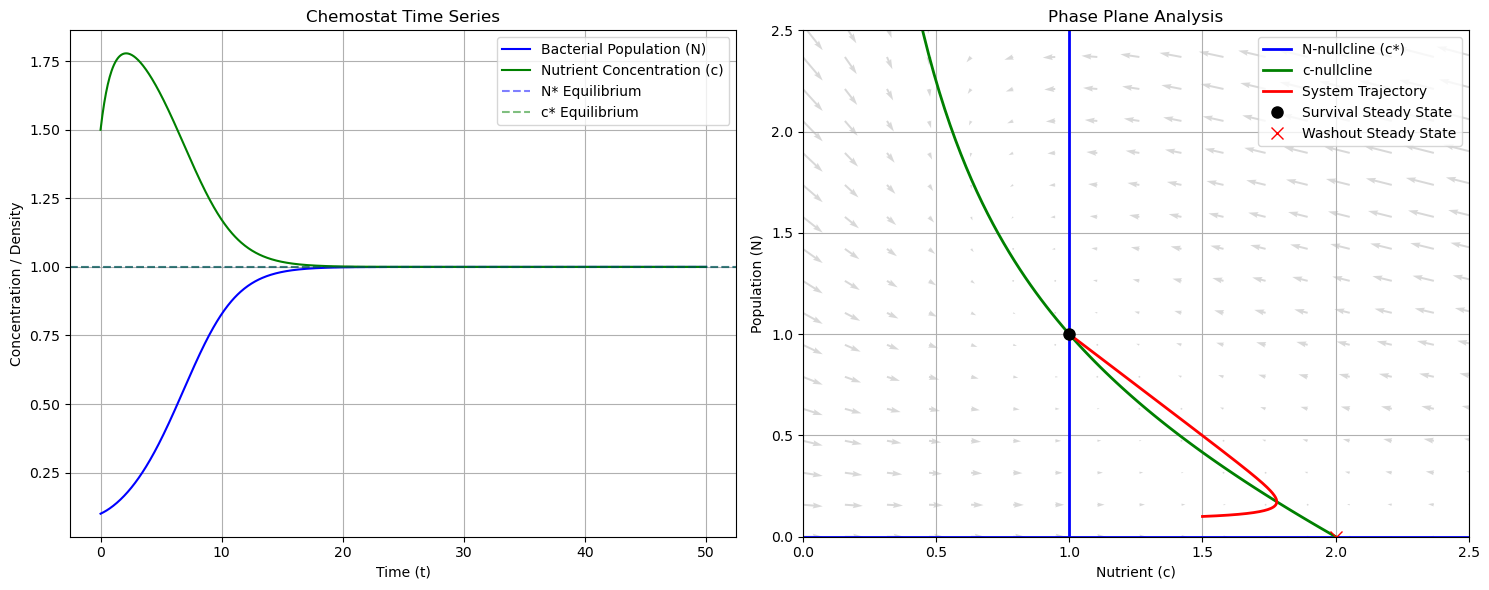

In [7]:
k_max = 2.0   # Must be > 1 for survival
c0 = 2.0      # Must be > 1/(k_max - 1) for survival
p = 1.0       # Half-saturation constant
alpha = 1.0   # Yield coefficient
F_tilde = 1.0 # Dilution rate (F/V)

t = np.linspace(0, 50, 1000)
y0 = [0.1, 1.5]  # Initial conditions: [N, c]

sol = odeint(chemostat, y0, t, args=(k_max, c0, p, alpha, F_tilde))

c_star = p / (k_max - F_tilde)
N_star = (c0 - c_star) / alpha

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(t, sol[:, 0], 'b-', label='Bacterial Population (N)')
ax1.plot(t, sol[:, 1], 'g-', label='Nutrient Concentration (c)')
ax1.axhline(N_star, color='b', linestyle='--', alpha=0.5, label='N* Equilibrium')
ax1.axhline(c_star, color='g', linestyle='--', alpha=0.5, label='c* Equilibrium')
ax1.set_title("Chemostat Time Series")
ax1.set_xlabel("Time (t)")
ax1.set_ylabel("Concentration / Density")
ax1.legend()
ax1.grid(True)

N_vals = np.linspace(0, c0 + 1, 20)
c_vals = np.linspace(0, c0 + 1, 20)
N_grid, C_grid = np.meshgrid(N_vals, c_vals)

dN = k_max * (C_grid / (C_grid + p)) * N_grid - F_tilde * N_grid
dC = -alpha * k_max * (C_grid / (C_grid + p)) * N_grid + F_tilde * c0 - F_tilde * C_grid
ax2.quiver(C_grid, N_grid, dC, dN, color='gray', alpha=0.3)

ax2.axvline(c_star, color='blue', lw=2, label='N-nullcline (c*)')
ax2.axhline(0, color='blue', lw=2)

c_null_range = np.linspace(0.01, c0, 100)
N_null_curve = (F_tilde * (c0 - c_null_range)) / (alpha * k_max * (c_null_range / (c_null_range + p)))
ax2.plot(c_null_range, N_null_curve, color='green', lw=2, label='c-nullcline')

ax2.plot(sol[:, 1], sol[:, 0], 'r-', lw=2, label='System Trajectory')
ax2.plot(c_star, N_star, 'ko', markersize=8, label='Survival Steady State')
ax2.plot(c0, 0, 'rx', markersize=8, label='Washout Steady State')

ax2.set_title("Phase Plane Analysis")
ax2.set_xlabel("Nutrient (c)")
ax2.set_ylabel("Population (N)")
ax2.set_xlim(0, c0 + 0.5)
ax2.set_ylim(0, c0 + 0.5)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Washout Scenario
The second eigenvalue $\lambda_2 = \frac{k_{max}c_0}{c_0+1} - 1$ becomes negative because the dilution rate (represented here by the subtracted "1" in normalized form) is now larger than the biotic potential. You will see the red line ($N$) crash to zero while the green line ($c$) rises to meet $c_0$, as there are no bacteria left to consume the incoming food. The trajectories no longer converge on an internal point; they all "slide" along the horizontal axis until they hit the fixed point $(c_0, 0)$.

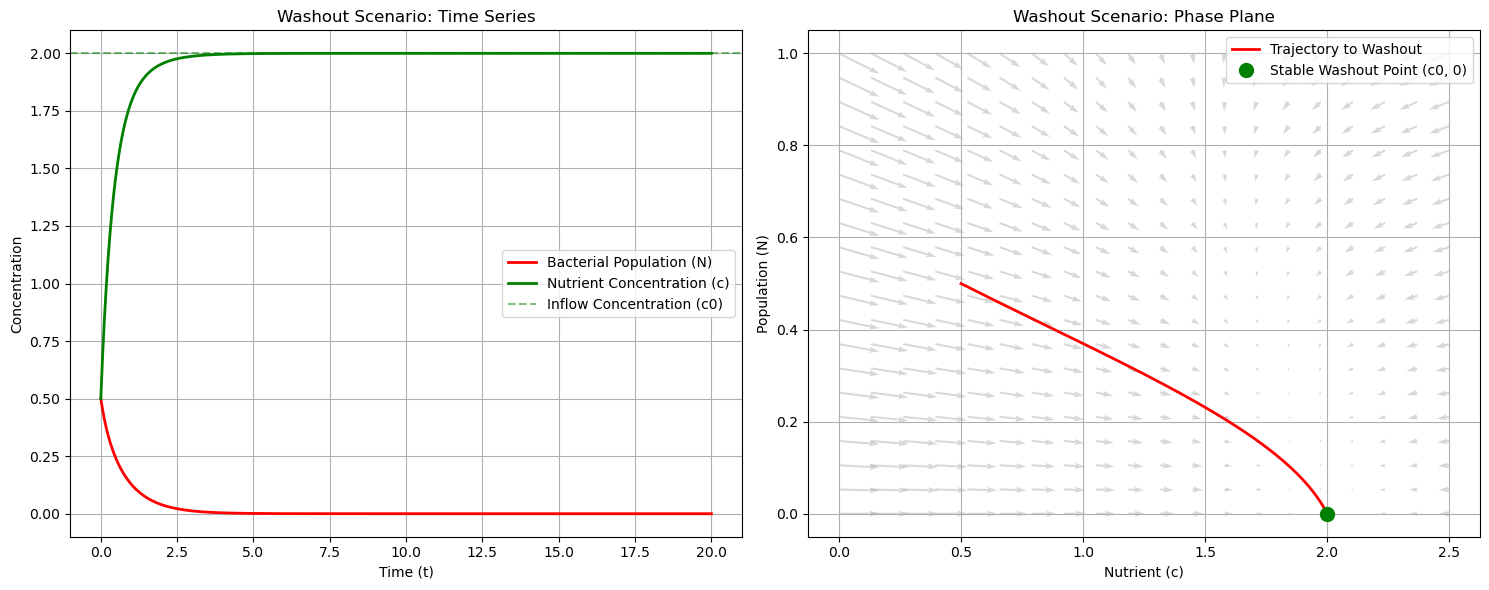

In [8]:
k_max = 2.0   
c0 = 2.0      
p = 1.0       
alpha = 1.0   
F_tilde = 2.5

t = np.linspace(0, 20, 1000)
y0 = [0.5, 0.5] # Starting with some bacteria and some nutrient
sol = odeint(chemostat, y0, t, args=(k_max, c0, p, alpha, F_tilde))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(t, sol[:, 0], 'r-', lw=2, label='Bacterial Population (N)')
ax1.plot(t, sol[:, 1], 'g-', lw=2, label='Nutrient Concentration (c)')
ax1.axhline(c0, color='g', linestyle='--', alpha=0.5, label='Inflow Concentration (c0)')
ax1.set_title("Washout Scenario: Time Series")
ax1.set_xlabel("Time (t)")
ax1.set_ylabel("Concentration")
ax1.legend()
ax1.grid(True)

c_vals = np.linspace(0, c0 + 0.5, 20)
N_vals = np.linspace(0, 1.0, 20)
C_grid, N_grid = np.meshgrid(c_vals, N_vals)

dN = k_max * (C_grid / (C_grid + p)) * N_grid - F_tilde * N_grid
dC = -alpha * k_max * (C_grid / (C_grid + p)) * N_grid + F_tilde * c0 - F_tilde * C_grid
ax2.quiver(C_grid, N_grid, dC, dN, color='gray', alpha=0.3)

ax2.plot(sol[:, 1], sol[:, 0], 'r-', lw=2, label='Trajectory to Washout')
ax2.plot(c0, 0, 'go', markersize=10, label='Stable Washout Point (c0, 0)')
ax2.set_title("Washout Scenario: Phase Plane")
ax2.set_xlabel("Nutrient (c)")
ax2.set_ylabel("Population (N)")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

### Washout Rate Bifurction
This plot reveals the "hidden" logic of the system's constraints:

- The Survival Zone: At low dilution rates (left side), the population $N^*$ is high and stable. As you increase the flow, the bacteria are forced to grow faster to keep up, which leaves more "unconsumed" nutrient $c^*$ in the tank
- The Critical Point ($F_{crit}$): This is the Transcritical Bifurcation. At exactly $F = \frac{k_{max} c_0}{c_0 + p}$, the survival state and the washout state collide.
- The Washout Zone: Beyond the red line, the dilution rate is higher than the maximum possible growth rate. The population drops to zero immediately and stays there.

**Biological Feedback**: This visualization perfectly illustrates the Negative Feedback. As $N$ increases, it pulls $c$ down; as $c$ goes down, it slows the growth of $N$. The bifurcation plot shows exactly where that feedback loop is overwhelmed by the external flow of the pump.

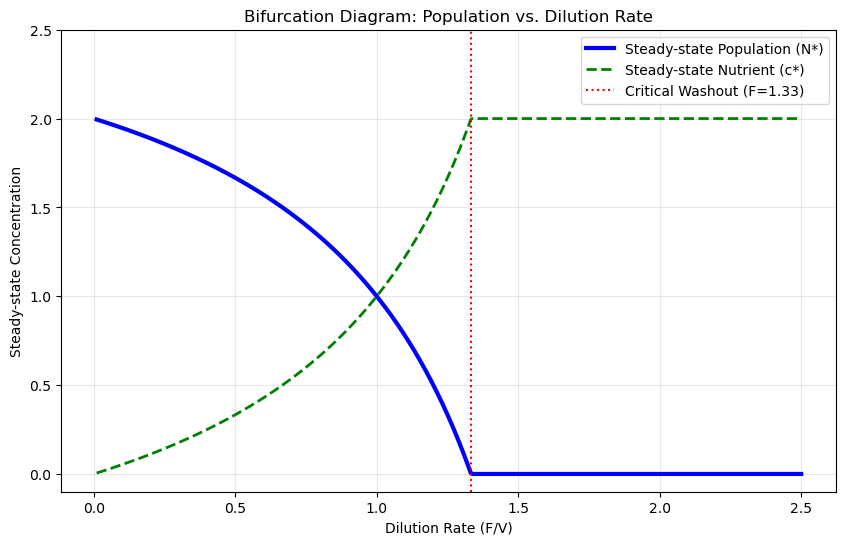

In [10]:
k_max = 2.0
c0 = 2.0
p = 1.0
alpha = 1.0

F_range = np.linspace(0.01, k_max + 0.5, 500)

N_steady = []
c_steady = []

for F in F_range:
    # Condition for existence of Survival State: F < (k_max * c0) / (c0 + p)
    # Using the simplified condition: k_max * c0 / (c0 + 1)
    if F < (k_max * c0) / (c0 + p):
        # Survival State
        c_star = (F * p) / (k_max - F)
        N_star = (c0 - c_star) / alpha
        N_steady.append(N_star)
        c_steady.append(c_star)
    else:
        # Washout State
        N_steady.append(0)
        c_steady.append(c0)

plt.figure(figsize=(10, 6))
plt.plot(F_range, N_steady, 'b-', lw=3, label='Steady-state Population (N*)')
plt.plot(F_range, c_steady, 'g--', lw=2, label='Steady-state Nutrient (c*)')

F_crit = (k_max * c0) / (c0 + p)
plt.axvline(F_crit, color='red', linestyle=':', label=f'Critical Washout (F={F_crit:.2f})')

plt.title("Bifurcation Diagram: Population vs. Dilution Rate")
plt.xlabel("Dilution Rate (F/V)")
plt.ylabel("Steady-state Concentration")
plt.ylim(-0.1, max(c0, max(N_steady)) + 0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Phase Portrait

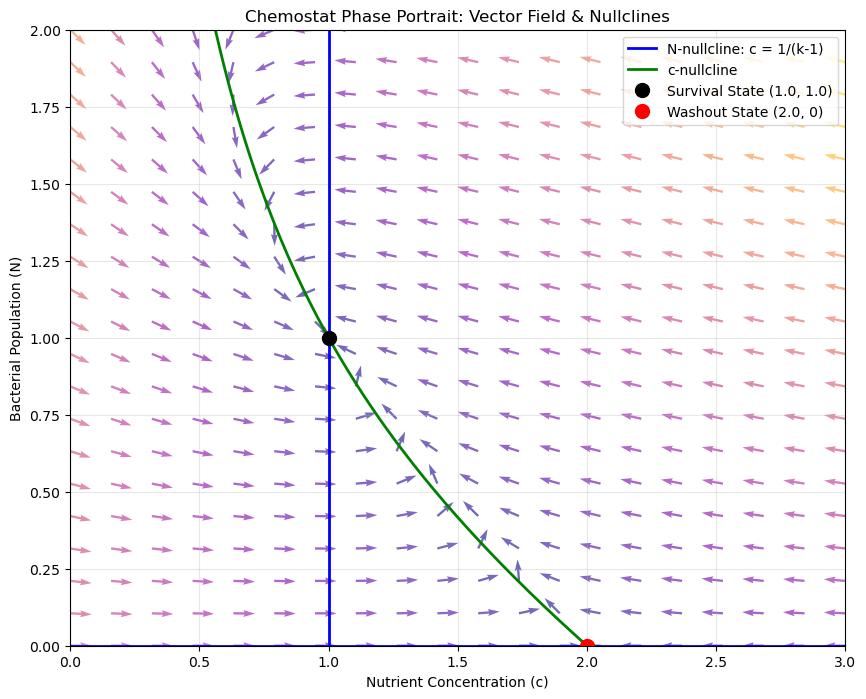

In [13]:
k = 2.0
c0 = 2.0
alpha = 1.0
p = 1.0
F_tilde = 1.0

c_vals = np.linspace(0, 3, 20)
N_vals = np.linspace(0, 2, 20)
C, N = np.meshgrid(c_vals, N_vals)

dndt = k * (C / (C + p)) * N - F_tilde * N
dcdt = -alpha * k * (C / (C + p)) * N + F_tilde * c0 - F_tilde * C

plt.figure(figsize=(10, 8))

M = np.sqrt(dndt**2 + dcdt**2)
M[M == 0] = 1 # Avoid division by zero
plt.quiver(C, N, dcdt/M, dndt/M, M, cmap=plt.cm.plasma, alpha=0.6)

c_star = p / (k - F_tilde)
plt.axvline(c_star, color='blue', lw=2, label='N-nullcline: c = 1/(k-1)')
plt.axhline(0, color='blue', lw=2)

c_range = np.linspace(0.1, 3, 200)
N_null = -((c_range - c0) * (c_range + p)) / (k * c_range)
plt.plot(c_range, N_null, color='green', lw=2, label='c-nullcline')

N_star = c0 - c_star
plt.plot(c_star, N_star, 'ko', markersize=10, label=f'Survival State ({c_star}, {N_star})')
plt.plot(c0, 0, 'ro', markersize=10, label=f'Washout State ({c0}, 0)')

plt.title("Chemostat Phase Portrait: Vector Field & Nullclines")
plt.xlabel("Nutrient Concentration (c)")
plt.ylabel("Bacterial Population (N)")
plt.xlim(0, 3)
plt.ylim(0, 2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

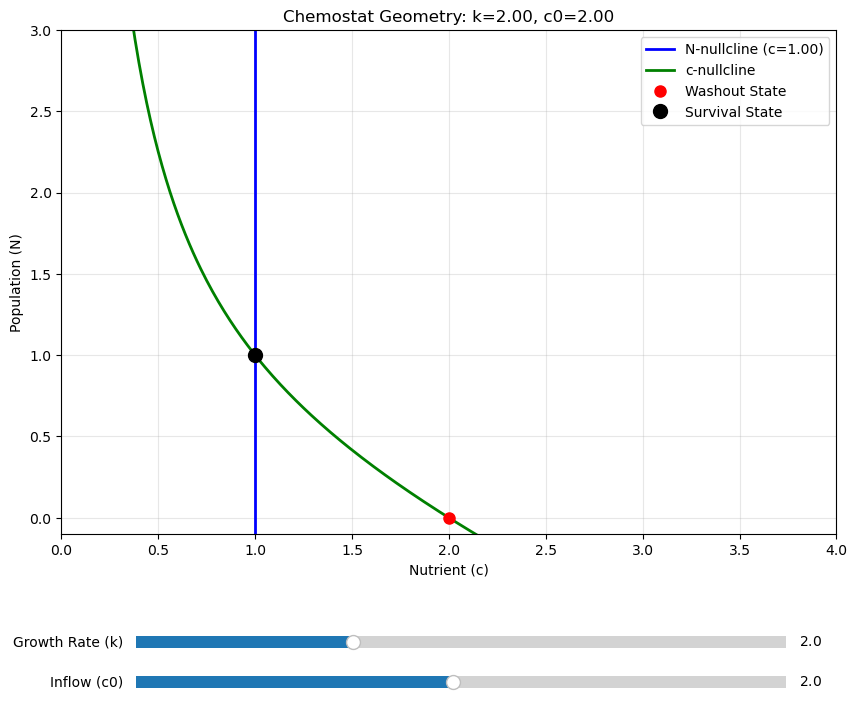

In [17]:
from matplotlib.widgets import Slider

k_init = 2.0
c0_init = 2.0
alpha = 1.0
p = 1.0
F_tilde = 1.0

fig, ax = plt.subplots(figsize=(10, 8))
plt.subplots_adjust(bottom=0.25)

c_range = np.linspace(0.01, 4, 400)

def update(val):
    k = s_k.val
    c0 = s_c0.val
    ax.clear()
    
    if k > F_tilde:
        c_star = p / (k - F_tilde)
        ax.axvline(c_star, color='blue', lw=2, label=f'N-nullcline (c={c_star:.2f})')
    
    N_null = -((c_range - c0) * (c_range + p)) / (k * c_range)
    ax.plot(c_range, N_null, color='green', lw=2, label='c-nullcline')
    
    ax.plot(c0, 0, 'ro', markersize=8, label='Washout State')
    
    if k > F_tilde:
        c_star = p / (k - F_tilde)
        if c0 > c_star:
            N_star = (c0 - c_star) / alpha
            ax.plot(c_star, N_star, 'ko', markersize=10, label='Survival State')
    
    ax.set_title(f"Chemostat Geometry: k={k:.2f}, c0={c0:.2f}")
    ax.set_xlabel("Nutrient (c)")
    ax.set_ylabel("Population (N)")
    ax.set_xlim(0, 4)
    ax.set_ylim(-0.1, 3)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    fig.canvas.draw_idle()

ax_k = plt.axes([0.2, 0.1, 0.65, 0.03])
ax_c0 = plt.axes([0.2, 0.05, 0.65, 0.03])

s_k = Slider(ax_k, 'Growth Rate (k)', 0.5, 5.0, valinit=k_init)
s_c0 = Slider(ax_c0, 'Inflow (c0)', 0.1, 4.0, valinit=c0_init)

s_k.on_changed(update)
s_c0.on_changed(update)

update(None)
plt.show()